In [ ]:
# %%capture
# !pip install --upgrade matplotlib #relevant as colab's default version doesnt support bar_label attribute
# # Restart the kernel automatically with upgraded matplotlib
# import os
# os.kill(os.getpid(), 9)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/STTM

/content/gdrive/MyDrive/STTM


In [ ]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import datetime
import re
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Load PervertedJustice Dataset

In [ ]:
from os import listdir
from os.path import isfile, join
import warnings
mypath = 'GeneralData'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.remove('chatlog.dtd')
corpus_pj = [] # each row is a string formed from all messages in a conversations
labels_pj = [] # each row is 0 or 1, corresponds to label for same row in corpus
for file in onlyfiles:
    df= pd.read_xml(f'GeneralData/{file}').drop(columns=['COMMENT'])
    df=df[~df['BODY'].isna()]
    df=df[~df['USERNAME'].isna()]
    string = " "
    for text in df.BODY.tolist():
        if text is not None:
            #preprocess:
            #preprocess:
            # text = preprocess_text(text)
            string = string + "\r\n" + text 
    corpus_pj.append(string)
    labels_pj.append(1)

In [ ]:
print(f'PJ Dataset consists of {len(onlyfiles)} predator - victim conversations')

PJ Dataset consists of 56 predator - victim conversations


# Load Pan12 Dataset

In [ ]:
def get_labels_dict(data_path):
    labels_dict = {}
    with open(data_path + 'sci_labels.csv', 'r') as f:
        file = csv.reader(f)
        for row in file:
            labels_dict[row[0]] = row[1]
    return labels_dict


def get_features_labels(root, labels_dict):
    corpus = [] # each row is a string formed from all messages in a conversations
    labels = [] # each row is 0 or 1, corresponds to label for same row in corpus
    for conversation in root:
        string = " "
        for message in conversation:
            text = message.find('text').text
            if text is not None:
                string = string + "\r\n" + text 
        corpus.append(string)
        labels.append(int(labels_dict[conversation.get('id')]))
    return corpus, labels

In [ ]:
train_data_path = "data/pan12-sexual-predator-identification-training-corpus-2012-05-01/"

training_xml = ET.parse(train_data_path + 'training_data.xml')
train_root = training_xml.getroot()

test_data_path = 'data/pan12-sexual-predator-identification-test-corpus-2012-05-21/'
test_xml = ET.parse(test_data_path + 'pan12-sexual-predator-identification-test-corpus-2012-05-17.xml')
test_root = test_xml.getroot()

train_corpus, train_labels = get_features_labels(train_root, get_labels_dict(train_data_path))
test_corpus, test_labels = get_features_labels(test_root, get_labels_dict(test_data_path))

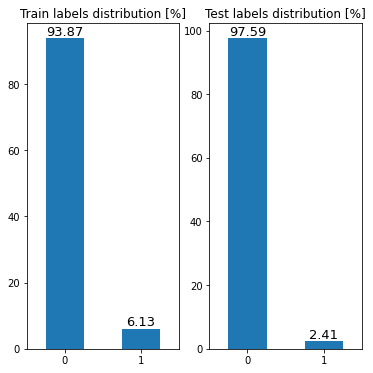

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(6, 6))
ax = (pd.Series(train_labels).value_counts()/len(train_labels)*100).round(2).plot(kind='bar',title='Train labels distribution [%]',ax= ax1)
ax.bar_label(ax1.containers[0],fontsize=13)
ax = (pd.Series(test_labels).value_counts()/len(test_labels)*100).round(2).plot(kind='bar',title='Test labels distribution [%]',ax=ax2)
ax.bar_label(ax2.containers[0],fontsize=13)
ax1.tick_params(axis='x', rotation=0)
ax2.tick_params(axis='x', rotation=0)
plt.show()

# Distribution of Number of lines per chat

In [ ]:
train_lines= pd.Series(train_corpus).apply(lambda x: x.count("\r\n"))
test_lines = pd.Series(test_corpus).apply(lambda x: x.count("\r\n"))
pj_lines = pd.Series(corpus_pj).apply(lambda x: x.count("\r\n"))

In [ ]:
print('PAN12 Train set - chat length description:\n')
print(train_lines.describe())
print()
print('PJ corpus - chat length description:\n')
print(pj_lines.describe())
print()
print('Test - chat length description:\n')
print(test_lines.describe())

PAN12 Train set - chat length description:

count    14703.000000
mean        46.780793
std         39.187808
min          1.000000
25%         22.000000
50%         33.000000
75%         61.000000
max       1160.000000
dtype: float64

PJ corpus - chat length description:

count       56.000000
mean      1373.464286
std       2116.216246
min         80.000000
25%        338.250000
50%        692.500000
75%       1266.500000
max      12005.000000
dtype: float64

Test - chat length description:

count    155128.000000
mean         13.324996
std          29.755515
min           0.000000
25%           3.000000
50%           4.000000
75%           7.000000
max        6427.000000
dtype: float64


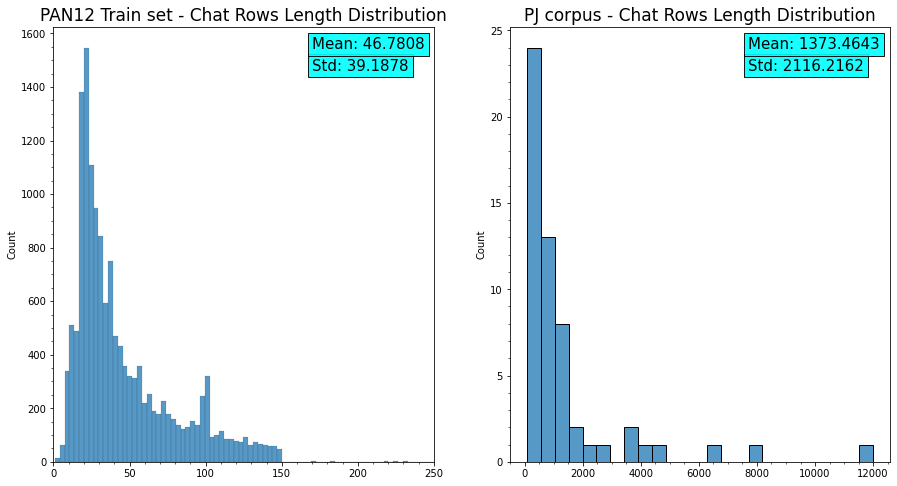

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
hs=sns.histplot(train_lines,ax=axes[0])
# hstes=sns.histplot(test_lines,ax=axes[1],bins= 400)
hstes=sns.histplot(pj_lines,ax=axes[1])

axes[0].set_title("PAN12 Train set - Chat Rows Length Distribution",fontsize=17)
# axes[1].set_title("Test - Chat Rows Length Distribution",fontsize=17)
axes[1].set_title("PJ corpus - Chat Rows Length Distribution",fontsize=17)
axes[0].minorticks_on()
axes[1].minorticks_on()
# train
x_min,x_max=hs.get_xlim()
y_min,y_max=hs.get_ylim()
axes[0].set_xlim(xmin=0, xmax = 250)
# axes[1].set_xlim(xmin=0, xmax = 150)

axes[0].text(200*0.85, y_max-y_max/10,f'Std: {np.round(train_lines.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
axes[0].text(200*0.85, y_max-y_max/20,f'Mean: {np.round(train_lines.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
# pj
x_min,x_max=hstes.get_xlim()
y_min,y_max=hstes.get_ylim()
axes[1].text(11000*0.7, y_max-y_max/10,f'Std: {np.round(pj_lines.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
axes[1].text(11000*0.7, y_max-y_max/20,f'Mean: {np.round(pj_lines.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
# axes[1].text(120*0.85, y_max-y_max/10,f'Std: {np.round(test_lines.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
# axes[1].text(120*0.85, y_max-y_max/20,f'Mean: {np.round(test_lines.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
plt.show()

# WordCloud of PAN12 train and PJ corpus

In [ ]:
!pip -q install stop-words


In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_eng = get_stop_words('en') #Spanish StopWords
stops = list(set(stop_words_eng + list(STOPWORDS)))
stops.extend(['\r\n','\r','\n','ye','apos'])

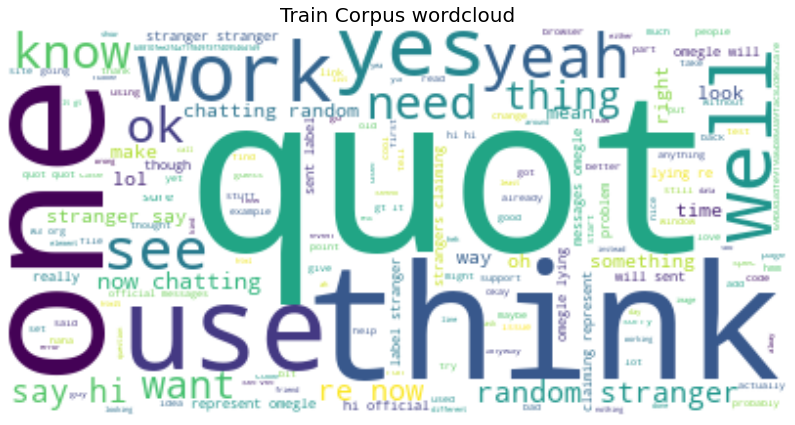

In [ ]:
train_wc = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stops
).generate(" ".join(train_corpus).lower())
# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(train_wc, interpolation='bilinear')
plt.title('Train Corpus wordcloud',size= 20)
plt.axis('off')
plt.show()

Now, considering the train corpus of PAN12, lets do a seperate word cloud for malicious talks (with predators) and 'benign' talks

In [ ]:
train_df =pd.DataFrame({'text': train_corpus,'labels':train_labels})


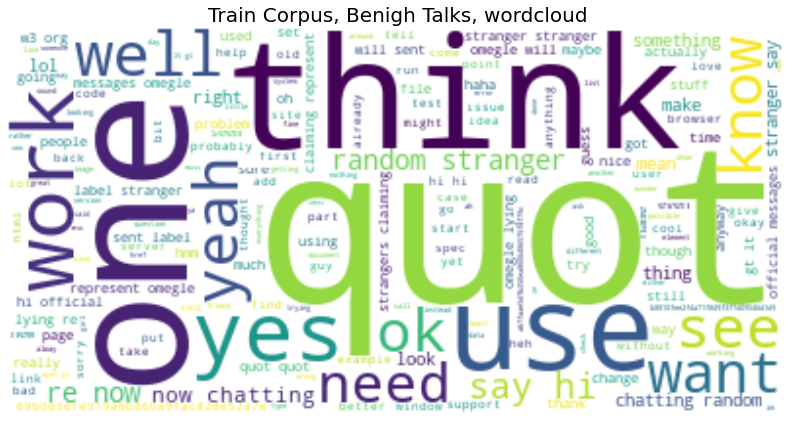

In [ ]:
train_benign = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stops
).generate(" ".join(train_df[train_df.labels == 0].text.str.lower().tolist()))
# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(train_benign, interpolation='bilinear')
plt.title('Train Corpus, Benigh Talks, wordcloud',size= 20)
plt.axis('off')
plt.show()

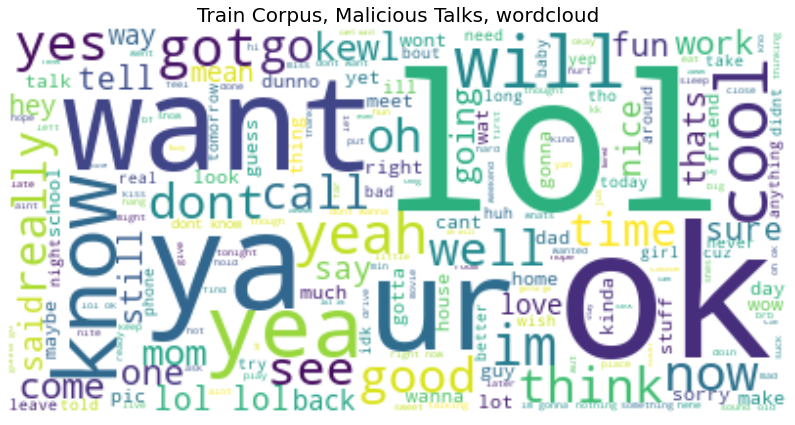

In [ ]:
train_mal = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stops
).generate(" ".join(train_df[train_df.labels == 1].text.str.lower().tolist()))
# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(train_mal, interpolation='bilinear')
plt.title('Train Corpus, Malicious Talks, wordcloud',size= 20)
plt.axis('off')
plt.show()

---

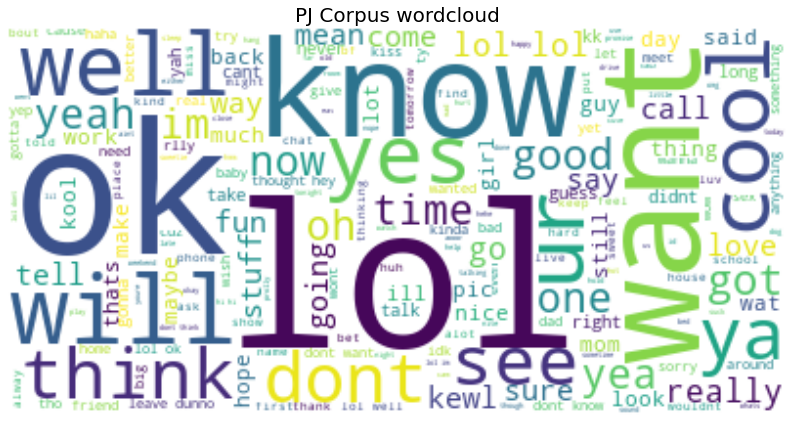

In [ ]:
pj_wc = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stops
).generate(" ".join(corpus_pj).lower())
# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(pj_wc, interpolation='bilinear')
plt.title('PJ Corpus wordcloud',size= 20)
plt.axis('off')
plt.show()

In [ ]:
# test_wc = WordCloud(
#     background_color='white',
#     max_words=200,
#     stopwords=stops
# ).generate(" ".join(test_corpus).lower())
# # display the cloud
# fig = plt.figure()
# fig.set_figwidth(14) # set width
# fig.set_figheight(18) # set height

# plt.imshow(test_wc, interpolation='bilinear')
# plt.title('Test Corpus wordcloud',size = 20)
# plt.axis('off')
# plt.show()

# EDA focusing on users inside a chat conversation

inside malicious / suspicious conversations

In [ ]:
from os import listdir
from os.path import isfile, join
import warnings
mypath = 'GeneralData'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.remove('chatlog.dtd')
corpus_pj = [] # each row is a string formed from all messages in a conversations
labels_pj = [] # each row is 0 or 1, corresponds to label for same row in corpus
length_pj = []
for file in onlyfiles:
    df= pd.read_xml(f'GeneralData/{file}').drop(columns=['COMMENT'])
    df=df[~df['BODY'].isna()]
    df=df[~df['USERNAME'].isna()]
    pred_name = file.split('.xml')[0].lower()
    corpus_pj.append(" ".join(df[df['USERNAME'].str.contains(pred_name,case=False)].BODY.tolist()))
    length_pj.append(len(df[df['USERNAME'].str.contains(pred_name,case=False)].BODY.tolist()))
    labels_pj.append(1)
    corpus_pj.append(" ".join(df[~df['USERNAME'].str.contains(pred_name,case=False)].BODY.tolist()))
    length_pj.append(len(df[~df['USERNAME'].str.contains(pred_name,case=False)].BODY.tolist()))
    labels_pj.append(0)

In [ ]:

def get_susp_conv_dict(data_path):
    labels_dict = {}
    with open(data_path + 'sci_labels.csv', 'r') as f:
        file = csv.reader(f)
        for row in file:
            labels_dict[row[0]] = row[1]
    return labels_dict


def get_predators_dict(file): 
    all_predators = {}
    with open(file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            all_predators[row[0]] = 1
    return all_predators
            

def get_features_labels(root, labels_dict, all_predators):
    corpus = [] # each row is a string formed from all messages in a conversations
    labels = [] # each row is 0 or 1, corresponds to label for same row in corpus
    length_talk = [] # each row is the summations of number of messages, the corpus is built upon
    for conversation in root:
        # only get suspicious conversations
        if labels_dict[conversation.get('id')] == '0':
            continue
        author_conv_dict = {}
        author_conv_length = {}
        tot_len = 0
        for message in conversation:
            author = message.find('author').text
            text = message.find('text').text
            if text is not None:
                tot_len+=1
                if author not in author_conv_dict:
                    author_conv_dict[author] = text
                    author_conv_length[author] = 1
                else:
                    author_conv_dict[author] += " " + text 
                    author_conv_length[author] +=1
        for author, conv in author_conv_dict.items():
            corpus.append(conv)
            if author in all_predators:
                labels.append(1)
            else:
                labels.append(0)
            length_talk.append(author_conv_length[author])
    return corpus, labels, length_talk

In [ ]:
train_data_path = "data/pan12-sexual-predator-identification-training-corpus-2012-05-01/"
training_xml = ET.parse(train_data_path + 'training_data.xml')
train_root = training_xml.getroot()

test_data_path = 'data/pan12-sexual-predator-identification-test-corpus-2012-05-21/'
test_xml = ET.parse(test_data_path + 'pan12-sexual-predator-identification-test-corpus-2012-05-17.xml')
test_root = test_xml.getroot()

pred_train_file_path = 'data/pan12-sexual-predator-identification-training-corpus-2012-05-01/pan12-sexual-predator-identification-training-corpus-predators-2012-05-01.txt'
pred_test_file_path = 'data/pan12-sexual-predator-identification-test-corpus-2012-05-21/pan12-sexual-predator-identification-groundtruth-problem1.txt'
train_corpus_mal, train_labels_mal,train_lt = get_features_labels(train_root, get_susp_conv_dict(train_data_path), get_predators_dict(pred_train_file_path))
test_corpus_mal, test_labels_mal,test_lt = get_features_labels(test_root, get_susp_conv_dict(test_data_path), get_predators_dict(pred_test_file_path))

In [ ]:
length_pan_df =pd.DataFrame({'text':train_corpus_mal,'labels': train_labels_mal,'length':train_lt})
length_pj_df =pd.DataFrame({'text':corpus_pj,'labels': labels_pj,'length':length_pj})


In [ ]:
print('PAN12 Train set - Predators Chat Rows Length description:\n')
print(length_pan_df[length_pan_df.labels == 1].describe())
print()
print('PJ corpus - Predators Chat Rows Length description:\n')
print(length_pj_df[length_pj_df.labels == 1].describe())
print()

PAN12 Train set - Predators Chat Rows Length description:

       labels      length
count   901.0  901.000000
mean      1.0   41.859046
std       0.0   49.725526
min       1.0    1.000000
25%       1.0   15.000000
50%       1.0   32.000000
75%       1.0   53.000000
max       1.0  730.000000

PJ corpus - Predators Chat Rows Length description:

       labels       length
count    56.0    56.000000
mean      1.0   641.767857
std       0.0   900.360170
min       1.0    33.000000
25%       1.0   150.750000
50%       1.0   379.000000
75%       1.0   613.750000
max       1.0  4624.000000



In [ ]:
print('PAN12 Train set - VIctims Chat Rows Length description:\n')
print(length_pan_df[length_pan_df.labels == 0].describe())
print()
print('PJ corpus - VIctims Chat Rows Length description:\n')
print(length_pj_df[length_pj_df.labels == 0].describe())
print()

PAN12 Train set - VIctims Chat Rows Length description:

       labels      length
count   907.0  907.000000
mean      0.0   40.466373
std       0.0   41.265384
min       0.0    1.000000
25%       0.0   15.000000
50%       0.0   33.000000
75%       0.0   52.000000
max       0.0  430.000000

PJ corpus - VIctims Chat Rows Length description:

       labels       length
count    56.0    56.000000
mean      0.0   731.696429
std       0.0  1260.225852
min       0.0    47.000000
25%       0.0   155.250000
50%       0.0   328.500000
75%       0.0   598.000000
max       0.0  7381.000000



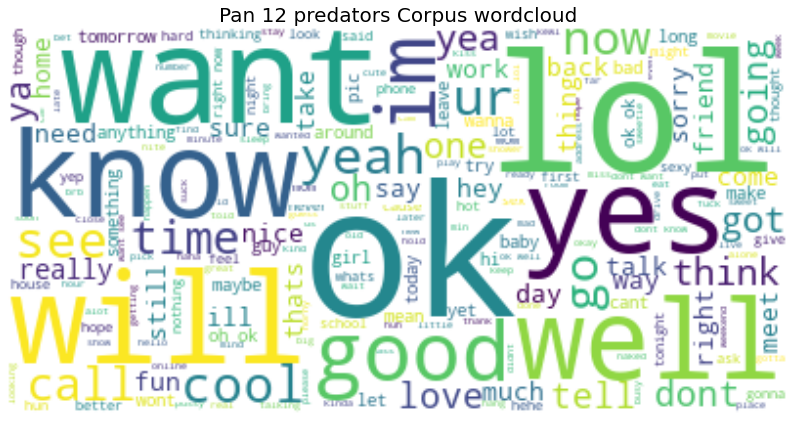

In [ ]:
pan_pred_wc = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stops
).generate(" ".join(length_pan_df[length_pan_df.labels == 1].text.str.lower().tolist()).lower())
# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(pan_pred_wc, interpolation='bilinear')
plt.title('Pan 12 predators Corpus wordcloud',size= 20)
plt.axis('off')
plt.show()

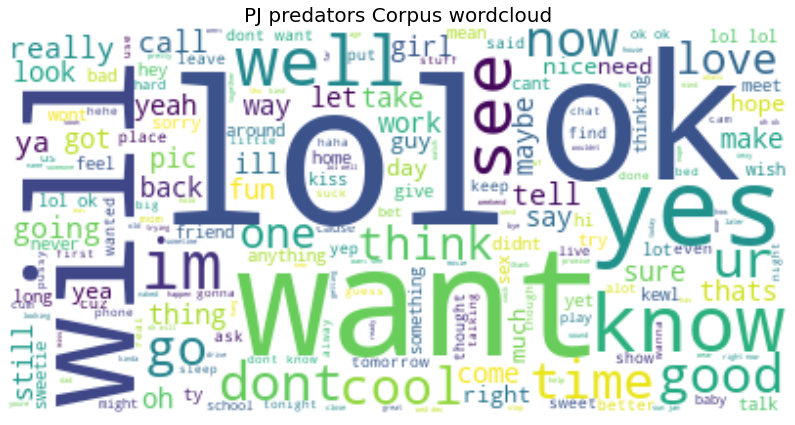

In [ ]:
pj_pred_wc = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stops
).generate(" ".join(length_pj_df[length_pj_df.labels == 1].text.str.lower().tolist()).lower())
# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(pj_pred_wc, interpolation='bilinear')
plt.title('PJ predators Corpus wordcloud',size= 20)
plt.axis('off')
plt.show()

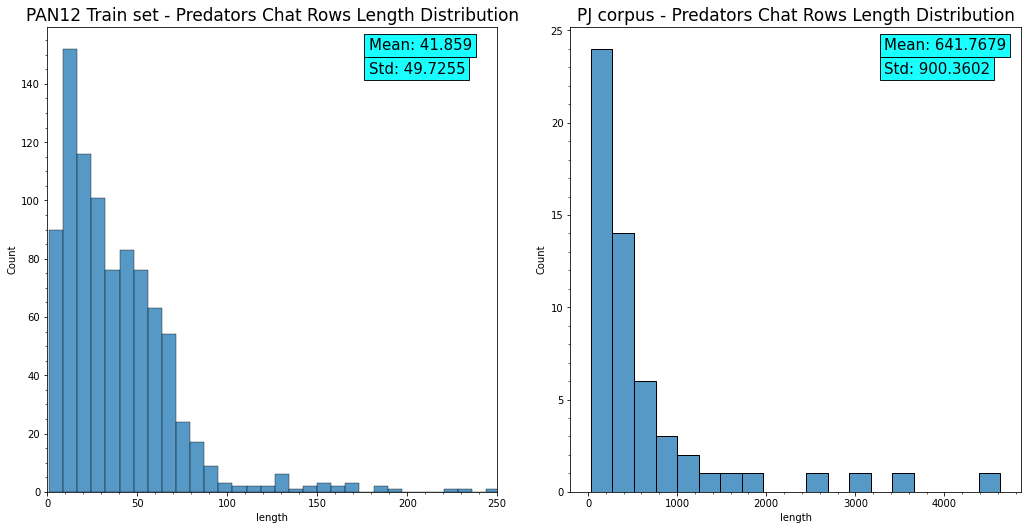

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
hs=sns.histplot(length_pan_df[length_pan_df.labels == 1].length,ax=axes[0])
# hstes=sns.histplot(test_lines,ax=axes[1],bins= 400)
hstes=sns.histplot(length_pj_df[length_pj_df.labels == 1].length,ax=axes[1])

axes[0].set_title("PAN12 Train set - Predators Chat Rows Length Distribution",fontsize=17)
# axes[1].set_title("Test - Chat Rows Length Distribution",fontsize=17)
axes[1].set_title("PJ corpus - Predators Chat Rows Length Distribution",fontsize=17)
axes[0].minorticks_on()
axes[1].minorticks_on()
# train
x_min,x_max=hs.get_xlim()
y_min,y_max=hs.get_ylim()
axes[0].set_xlim(xmin=0, xmax = 250)
# axes[1].set_xlim(xmin=0, xmax = 150)

axes[0].text(210*0.85, y_max-y_max/10,f'Std: {np.round(length_pan_df[length_pan_df.labels == 1].length.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
axes[0].text(210*0.85, y_max-y_max/20,f'Mean: {np.round(length_pan_df[length_pan_df.labels == 1].length.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
# pj
x_min,x_max=hstes.get_xlim()
y_min,y_max=hstes.get_ylim()
axes[1].text(4100*0.81, y_max-y_max/10,f'Std: {np.round(length_pj_df[length_pj_df.labels == 1].length.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
axes[1].text(4100*0.81, y_max-y_max/20,f'Mean: {np.round(length_pj_df[length_pj_df.labels == 1].length.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
# axes[1].text(120*0.85, y_max-y_max/10,f'Std: {np.round(test_lines.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
# axes[1].text(120*0.85, y_max-y_max/20,f'Mean: {np.round(test_lines.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
plt.tight_layout(pad=3.0)
plt.show()

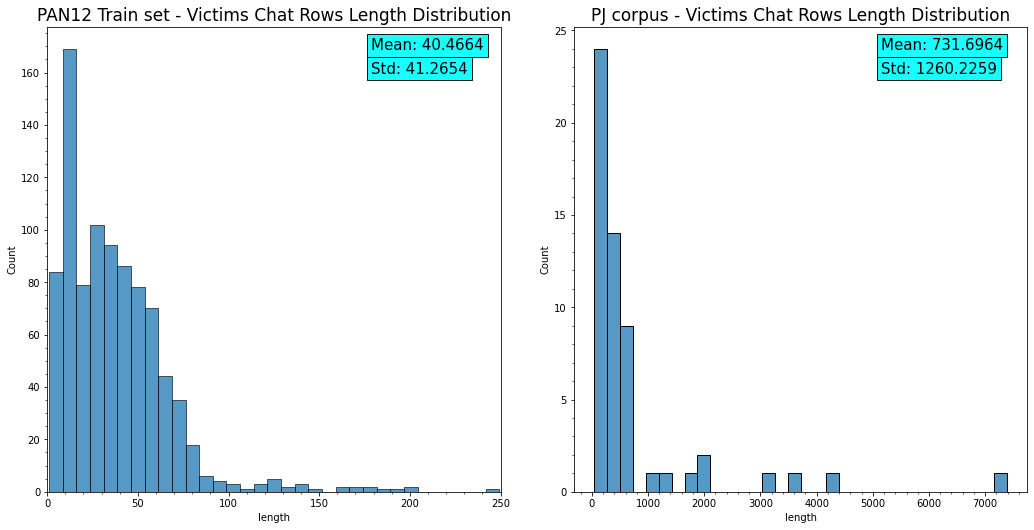

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
hs=sns.histplot(length_pan_df[length_pan_df.labels == 0].length,ax=axes[0])
# hstes=sns.histplot(test_lines,ax=axes[1],bins= 400)
hstes=sns.histplot(length_pj_df[length_pj_df.labels == 0].length,ax=axes[1])

axes[0].set_title("PAN12 Train set - Victims Chat Rows Length Distribution",fontsize=17)
# axes[1].set_title("Test - Chat Rows Length Distribution",fontsize=17)
axes[1].set_title("PJ corpus - Victims Chat Rows Length Distribution",fontsize=17)
axes[0].minorticks_on()
axes[1].minorticks_on()
# train
x_min,x_max=hs.get_xlim()
y_min,y_max=hs.get_ylim()
axes[0].set_xlim(xmin=0, xmax = 250)
# axes[1].set_xlim(xmin=0, xmax = 150)

axes[0].text(210*0.85, y_max-y_max/10,f'Std: {np.round(length_pan_df[length_pan_df.labels == 0].length.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
axes[0].text(210*0.85, y_max-y_max/20,f'Mean: {np.round(length_pan_df[length_pan_df.labels == 0].length.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
# pj
x_min,x_max=hstes.get_xlim()
y_min,y_max=hstes.get_ylim()
axes[1].text(6200*0.83, y_max-y_max/10,f'Std: {np.round(length_pj_df[length_pj_df.labels == 0].length.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
axes[1].text(6200*0.83, y_max-y_max/20,f'Mean: {np.round(length_pj_df[length_pj_df.labels == 0].length.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
# axes[1].text(120*0.85, y_max-y_max/10,f'Std: {np.round(test_lines.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
# axes[1].text(120*0.85, y_max-y_max/20,f'Mean: {np.round(test_lines.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
from IPython.display import Image
Image(url='https://i.pinimg.com/originals/7a/f4/74/7af4748cbb3992221c2092a673b5c57b.gif')


(https://assets.pinterest.com/ext/embed.html?id=397161260870415033